# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.497  1  0.668 0.415 0.003   
                             age        0.109  1  0.147 0.702 0.001   
                             Kiel       2.582  1  3.475 0.064 0.018   
                             Magdeburg  5.998  1  8.070 0.005 0.041   
                             Sweden     9.103  1 12.248 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.831  1  0.882 0.349 0.005   
                             age        1.923  1  2.041 0.155 0.011   
                             Kiel       0.037  1  0.039 0.844 0.000   
                             Magdeburg  1.207  1  1.281 0.259 0.007   
                             Sweden    18.013  1 19.117 0.000 0.091   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.382  0.574    False  
                             age               0.154  0.806    False  
                             Kiel              1.195  0.148    False  
                             Magdeburg         2.302  0.019     True  
                             Sweden            3.237  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.457  0.511    False  
                             age               0.810  0.289    False  
                             Kiel              0.074  0.906    False  
                             Magdeburg         0.587  0.417    False  
                             Sweden            4.695  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.997  1  7.287 0.008 0.037   
                             age        0.001  1  0.008 0.931 0.000   
                             Kiel       0.224  1  1.638 0.202 0.009   
                             Magdeburg  0.468  1  3.422 0.066 0.018   
                             Sweden     1.700  1 12.432 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.279  1  2.824 0.094 0.015   
                             age        0.700  1  1.546 0.215 0.008   
                             Kiel       1.941  1  4.286 0.040 0.022   
                             Magdeburg  1.640  1  3.620 0.059 0.019   
                             Sweden    13.217  1 29.178 0.000 0.133   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.121  0.022     True  
                             age               0.031  0.957    False  
                             Kiel              0.694  0.326    False  
                             Magdeburg         1.181  0.134    False  
                             Sweden            3.277  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.025  0.179    False  
                             age               0.667  0.341    False  
                             Kiel              1.400  0.089    False  
                             Magdeburg         1.232  0.122    False  
                             Sweden            6.710  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.415         0.382  0.574    False   
                             age       0.702         0.154  0.806    False   
                             Kiel      0.064         1.195  0.148    False   
                             Magdeburg 0.005         2.302  0.019     True   
                             Sweden    0.001         3.237  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.349         0.457  0.511    False   
                             age       0.155         0.810  0.289    False   
                             Kiel      0.844         0.074  0.906    False   
                             Magdeburg 0.259         0.587  0.417    False   
                             Sweden    0.000         4.695  0.000     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.121  0.022     True  
                             age       0.931         0.031  0.957    False  
                             Kiel      0.202         0.694  0.326    False  
                             Magdeburg 0.066         1.181  0.134    False  
                             Sweden    0.001         3.277  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.094         1.025  0.179    False  
                             age       0.215         0.667  0.341    False  
                             Kiel      0.040         1.400  0.089    False  
                             Magdeburg 0.059         1.232  0.122    False  
                             Sweden    0.000         6.710  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.489     0.336     0.233         3.087     0.291
std       0.301         5.347     0.328     0.295         5.824     0.322
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.338     0.015     0.001         0.387     0.003
50%       0.125         0.904     0.249     0.071         1.151     0.141
75%       0.460         2.412     0.613     0.410         3.096     0.547
max       1.000       142.364     1.000     1.000        85.685     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.415         0.382   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.371   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.007   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.527         0.278   
A0A075B6H7                                         AD     0.271         0.567   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.059         1.229   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.493         0.307   
S4R3U6                                             AD     0.349         0.457   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.574    False   
A0A024R0T9;K7ER74;P02655                           AD      0.107    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.208    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.672    False   
A0A075B6H7                                         AD      0.430    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.140    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.644    False   
S4R3U6                                             AD      0.511    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.121   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.475   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.383         0.417   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.258         0.589   
A0A075B6H7                                         AD     0.015         1.810   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.145         0.838   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.389         0.410   
S4R3U6                                             AD     0.094         1.025   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.022     True  
A0A024R0T9;K7ER74;P02655                           AD      0.077    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.520    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.392    False  
A0A075B6H7                                         AD      0.041     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.247         1.411     0.329     0.246         1.515     0.311
std       0.287         1.615     0.313     0.295         1.749     0.317
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.012         0.365     0.038     0.009         0.370     0.025
50%       0.118         0.928     0.239     0.099         1.006     0.185
75%       0.431         1.932     0.590     0.427         2.059     0.562
max       0.997        21.555     0.998     0.999        18.347     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1021,975


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.415         0.382  0.574   
A0A024R0T9;K7ER74;P02655                           0.043         1.371  0.107   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.098         1.007  0.208   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.527         0.278  0.672   
A0A075B6H7                                         0.271         0.567  0.430   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.059         1.229  0.140   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.493         0.307  0.644   
S4R3U6                                             0.349         0.457  0.511   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.008   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.383   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.258   
A0A075B6H7                                            False 0.015   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.145   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.389   
S4R3U6                                                False 0.094   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.121  0.022   
A0A024R0T9;K7ER74;P02655                                   1.475  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.417  0.520   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.589  0.392   
A0A075B6H7                                                 1.810  0.041   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.292   
Q9Y6X5                                                     0.838  0.251   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.162   
Q9Y6Y9                                                     0.410  0.526   
S4R3U6                                                     1.025  0.179   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    898
PI (yes) - RF (yes)   323
PI (no)  - RF (yes)   123
PI (yes) - RF (no)     77
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                 p-unc -Log10 pvalue qvalue   
protein groups                                                                
A0A024QZX5;A0A087X1N8;P35237                     0.415         0.382  0.574   
A0A075B6H7                                       0.271         0.567  0.430   
A0A075B6I0                                       0.030         1.529  0.081   
A0A075B6R2                                       0.329         0.483  0.490   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2 0.854         0.068  0.913   
...                                                ...           ...    ...   
Q9UNW1                                           0.006         2.207  0.023   
Q9UP79                                           0.154         0.812  0.288   
Q9UQ52                                           0.116         0.935  0.237   
Q9Y653;Q9Y653-2;Q9Y653-3                         0.013         1.872  0.043   
Q9Y6C2                                           0.322         0.492  0.484   

                                                             RF                \
                                                 rejected p-unc -Log10 pvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                        False 0.008         2.121   
A0A075B6H7                                          False 0.015         1.810   
A0A075B6I0                                          False 0.001         3.129   
A0A075B6R2                                          False 0.003         2.572   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2    False 0.000         4.025   
...                                                   ...   ...           ...   
Q9UNW1                                               True 0.803         0.095   
Q9UP79                                              False 0.000         3.765   
Q9UQ52                                              False 0.001         3.189   
Q9Y653;Q9Y653-2;Q9Y653-3                             True 0.785         0.105   
Q9Y6C2                                              False 0.018         1.747   

                                                                      data  
                                                 qvalue rejected frequency  
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237                      0.022     True       186  
A0A075B6H7                                        0.041     True        91  
A0A075B6I0                                        0.003     True       194  
A0A075B6R2                                        0.009     True       164  
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2  0.000     True       134  
...                                                 ...      ...       ...  
Q9UNW1                                            0.870    False       171  
Q9UP79                                            0.001     True       135  
Q9UQ52                                            0.003     True       188  
Q9Y653;Q9Y653-2;Q9Y653-3                          0.857    False       177  
Q9Y6C2                                            0.046     True       119  

[200 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.574,0.022,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.107,0.077,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.208,0.520,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.672,0.392,196,PI (no) - RF (no)
A0A075B6H7,0.430,0.041,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.292,197,PI (no) - RF (no)
Q9Y6X5,0.140,0.251,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.162,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.001,0.987,119,PI (yes) - RF (no),0.986
Q8N9I0,0.969,0.005,141,PI (no) - RF (yes),0.964
F6VDH7;P50502;Q3KNR6,0.019,0.964,175,PI (yes) - RF (no),0.945
G3V2U7;P07311,0.015,0.955,130,PI (yes) - RF (no),0.940
O75083,0.027,0.949,102,PI (yes) - RF (no),0.922
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.049,197,PI (no) - RF (yes),0.009
Q9NX62,0.056,0.047,197,PI (no) - RF (yes),0.008
K7ERG9;P00746,0.052,0.044,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


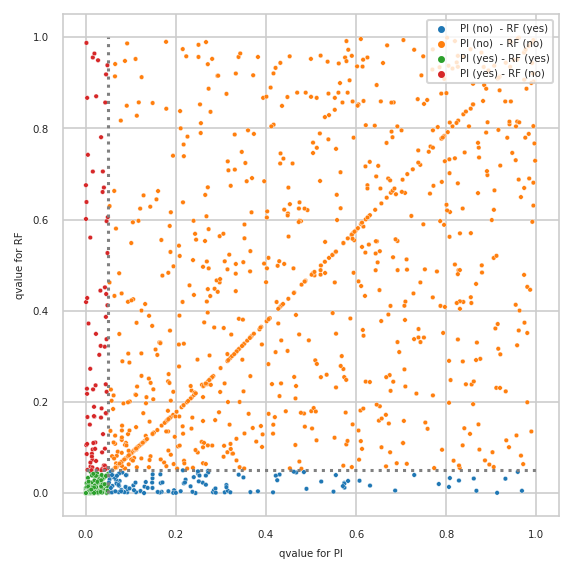

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


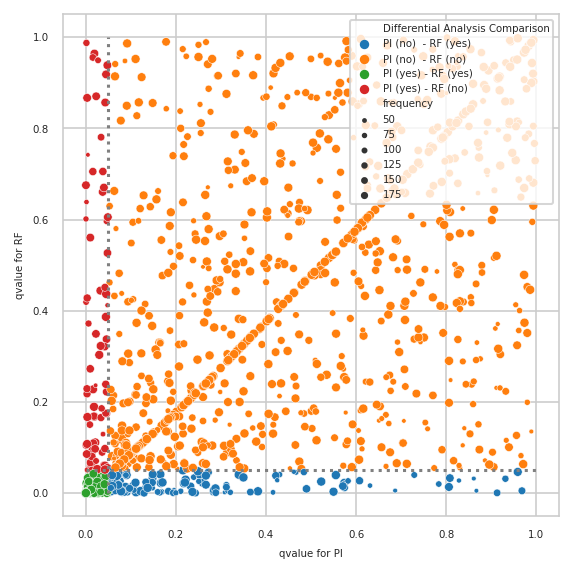

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out